In [2]:
#Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import sklearn.metrics as metrics

color = sns.color_palette()
%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing the dataset

price = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
price.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [4]:
#Renaming the columns

price.columns = price.columns.str.replace(' ', '_').str.replace('&', 'N')

In [5]:
#Checking the header again

price.head()

,Date,Infosys,Indian_Hotel,Mahindra_N_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [6]:
#Shape of the dataset

print('The number of rows (observations) is',price.shape[0],'\n''The number of columns (variables) is',price.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [7]:
#Information of the dataset

price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_N_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [8]:
#Converting Date to datime datatype field

price['Date'] = [pd.to_datetime(d) for d in price['Date']]

#Information
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    datetime64[ns]
 1   Infosys              314 non-null    int64         
 2   Indian_Hotel         314 non-null    int64         
 3   Mahindra_N_Mahindra  314 non-null    int64         
 4   Axis_Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree_Cement         314 non-null    int64         
 7   Sun_Pharma           314 non-null    int64         
 8   Jindal_Steel         314 non-null    int64         
 9   Idea_Vodafone        314 non-null    int64         
 10  Jet_Airways          314 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 27.1 KB


In [9]:
price.tail()

,Date,Infosys,Indian_Hotel,Mahindra_N_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
309,2020-02-03,729,120,469,658,33,23110,401,146,3,22
310,2020-09-03,634,114,427,569,30,21308,384,121,6,18
311,2020-03-16,577,90,321,428,27,18904,365,105,3,16
312,2020-03-23,644,75,293,360,21,17666,338,89,3,14
313,2020-03-30,633,75,284,379,23,17546,352,82,3,14


In [10]:
#Summary statistics of the dataset

price.describe()

,Infosys,Indian_Hotel,Mahindra_N_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


#### 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

###### Shree cements price vs Time

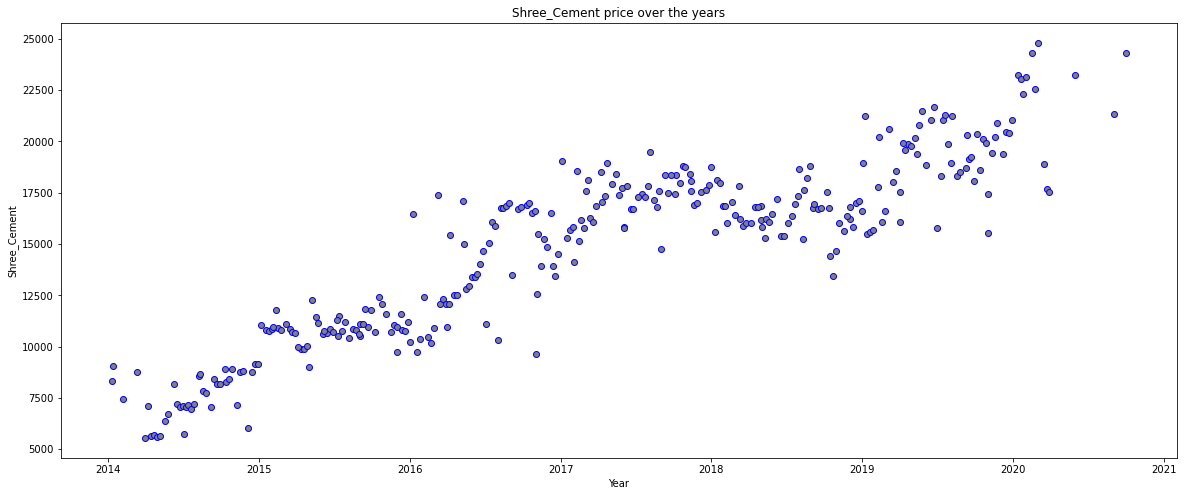

In [11]:
plt.scatter(price['Date'], price['Shree_Cement'], edgecolors='b', color = 'grey')
plt.xlabel('Year')
plt.ylabel('Shree_Cement')
plt.title('Shree_Cement price over the years')
plt.show()

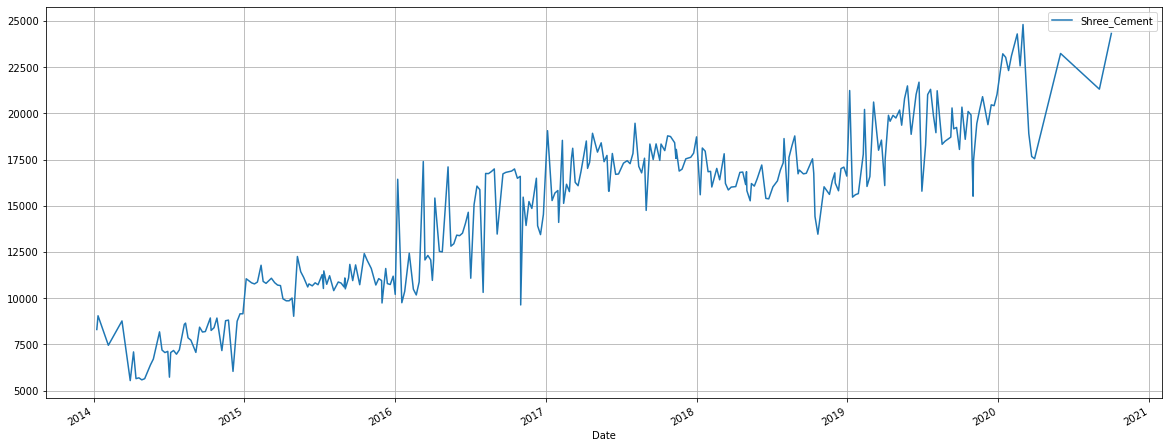

In [12]:
df_Shree_Cement = price[['Date', 'Shree_Cement']]
df_Shree_Cement.set_index('Date',inplace=True)

#Plot the data
df_Shree_Cement.plot()
plt.grid();

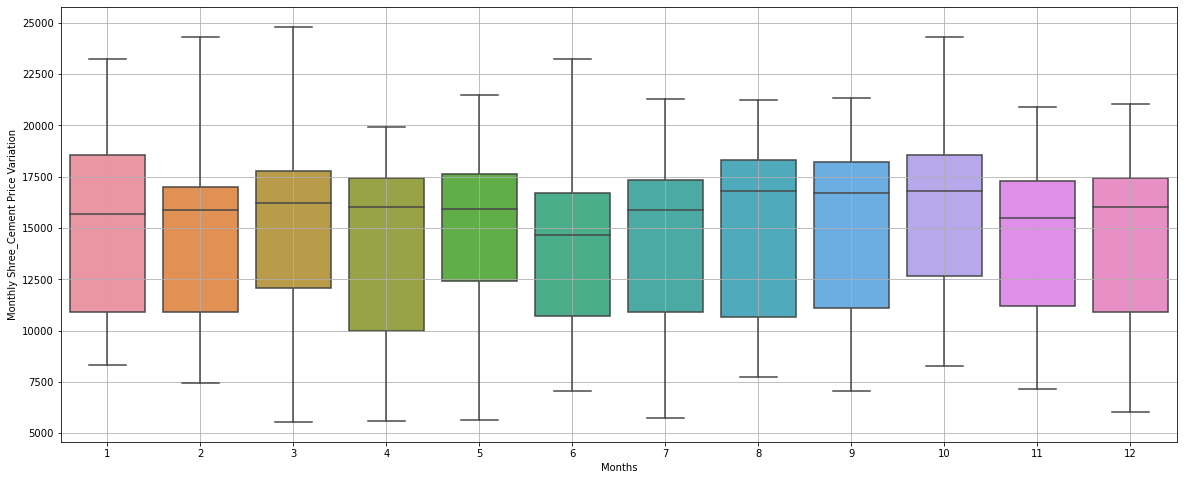

In [18]:
#Boxplot of month wise price variation

sns.boxplot(df_Shree_Cement.index.month,df_Shree_Cement['Shree_Cement'])
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Shree_Cement Price Variation');

###### Idea_Vodafone price vs Time

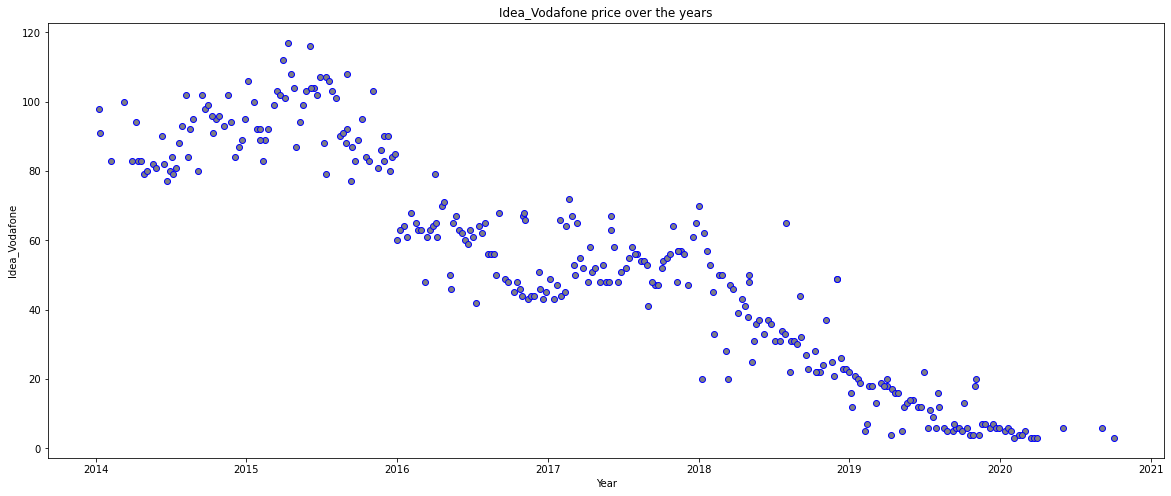

In [19]:
plt.scatter(price['Date'], price['Idea_Vodafone'], edgecolors='b', color = 'grey')
plt.xlabel('Year')
plt.ylabel('Idea_Vodafone')
plt.title('Idea_Vodafone price over the years')
plt.show()

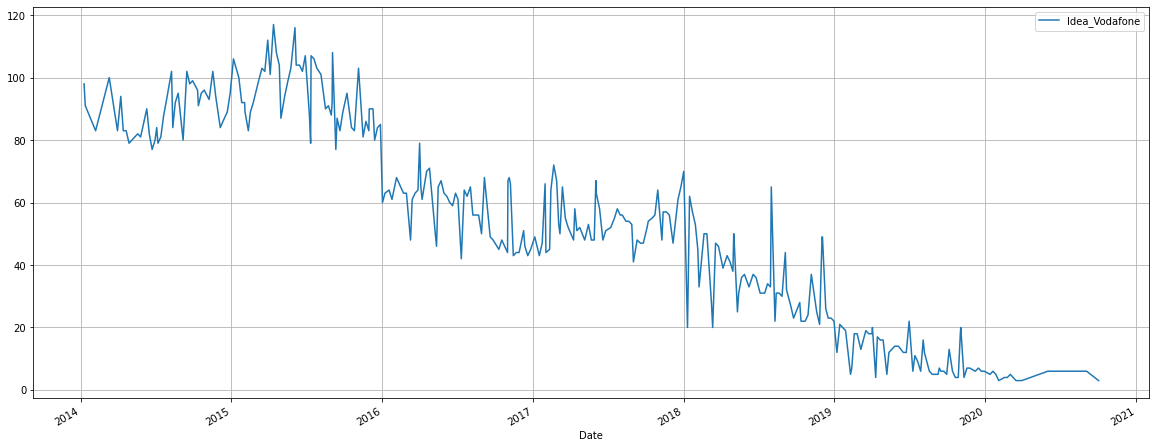

In [20]:
df_Idea_Vodafone = price[['Date', 'Idea_Vodafone']]
df_Idea_Vodafone.set_index('Date',inplace=True)

#Plot the data
df_Idea_Vodafone.plot()
plt.grid();

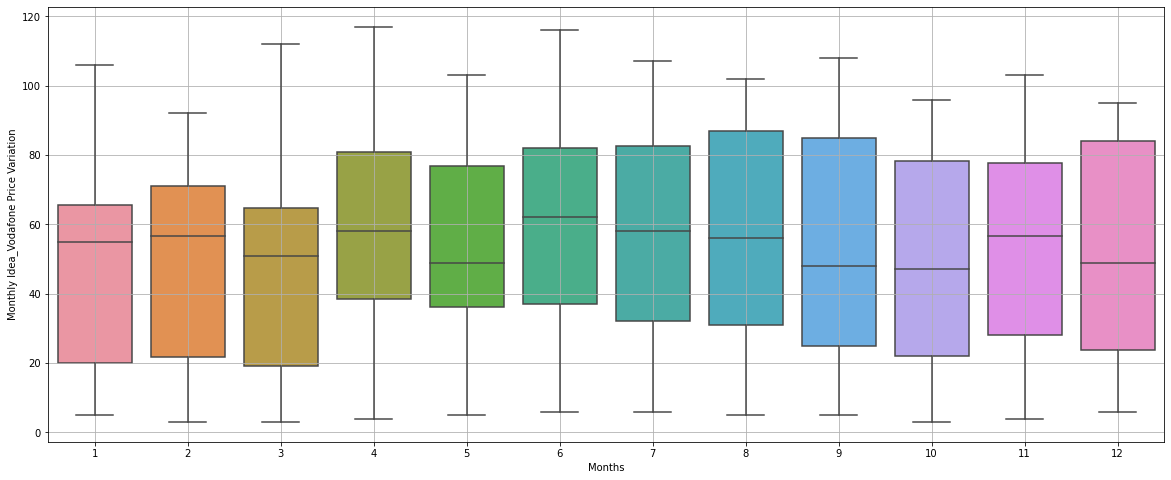

In [21]:
#Boxplot of month wise price variation

sns.boxplot(df_Idea_Vodafone.index.month,df_Idea_Vodafone['Idea_Vodafone'])
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Idea_Vodafone Price Variation');

#### 2.2 Calculate Returns for all stocks with inference

In [22]:
#Drop the date column

price.drop('Date',axis =1,inplace = True)

In [23]:
#Calculating returns

returns = np.log(price).diff(axis = 0, periods = 1) 

In [24]:
#Head of the returns dataset
returns.head()

,Infosys,Indian_Hotel,Mahindra_N_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [25]:
#Shape of the dataset
print('The number of rows (observations) is',returns.shape[0],'\n''The number of columns (variables) is',returns.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 10


In [26]:
#Information of the dataset
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Infosys              313 non-null    float64
 1   Indian_Hotel         313 non-null    float64
 2   Mahindra_N_Mahindra  313 non-null    float64
 3   Axis_Bank            313 non-null    float64
 4   SAIL                 313 non-null    float64
 5   Shree_Cement         313 non-null    float64
 6   Sun_Pharma           313 non-null    float64
 7   Jindal_Steel         313 non-null    float64
 8   Idea_Vodafone        313 non-null    float64
 9   Jet_Airways          313 non-null    float64
dtypes: float64(10)
memory usage: 24.7 KB


In [27]:
#Summary statistics of the dataset
returns.describe()

,Infosys,Indian_Hotel,Mahindra_N_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,0.002794,0.000266,-0.001506,0.001167,-0.003463,0.003681,-0.001455,-0.004123,-0.010608,-0.009548
std,0.035070,0.047131,0.040169,0.045828,0.062188,0.039917,0.045033,0.075108,0.104315,0.097972
min,-0.167300,-0.236389,-0.285343,-0.284757,-0.251314,-0.129215,-0.179855,-0.283768,-0.693147,-0.458575
25%,-0.014514,-0.023530,-0.020884,-0.022473,-0.040822,-0.019546,-0.020699,-0.049700,-0.045120,-0.052644
50%,0.004376,0.000000,0.001526,0.001614,0.000000,0.003173,0.001530,0.000000,0.000000,-0.005780
75%,0.024553,0.027909,0.019894,0.028522,0.032790,0.029873,0.023257,0.037179,0.024391,0.036368
max,0.135666,0.199333,0.089407,0.127461,0.309005,0.152329,0.166604,0.243978,0.693147,0.300249


#### 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

In [28]:
#Calculating stock means

stock_means = returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_N_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

In [29]:
#Calculating stock standard deviation

stock_sd = returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_N_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

In [30]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_N_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


#### 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

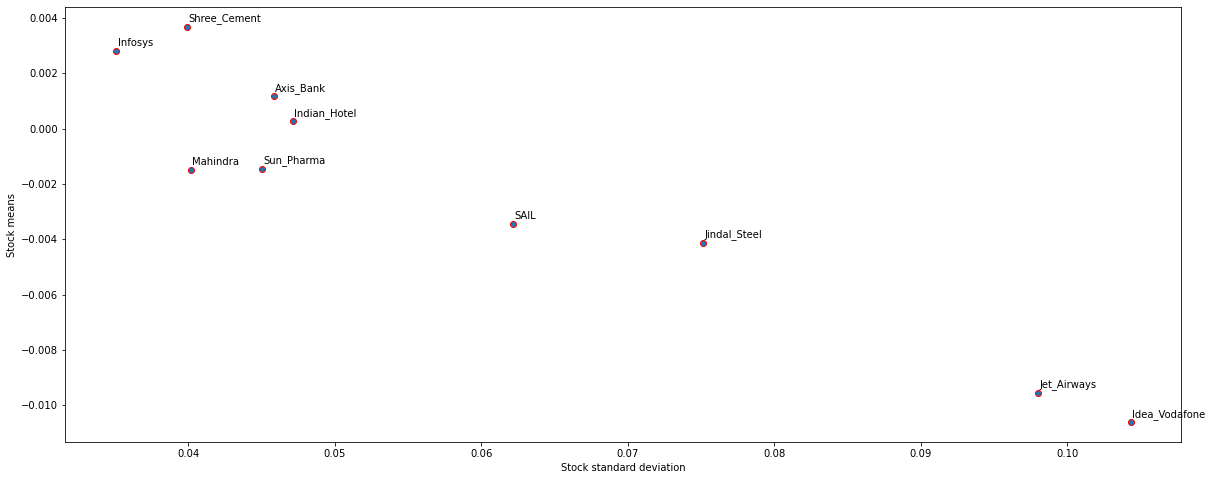

In [31]:
n = ['Infosys','Indian_Hotel','Mahindra','Axis_Bank','SAIL','Shree_Cement','Sun_Pharma','Jindal_Steel','Idea_Vodafone','Jet_Airways']

plt.scatter(stock_sd, stock_means, edgecolors='r')

for i, txt in enumerate(n):
    plt.annotate(txt, (stock_sd[i], stock_means[i]), (stock_sd[i]+0.0001, stock_means[i]+0.0002))

plt.xlabel('Stock standard deviation')
plt.ylabel('Stock means')
plt.show()

#### 2.5 Conclusion and Recommendations

In [88]:
df.sort_values(by = 'Volatility')

,Average,Volatility
Infosys,0.002794,0.035070
Shree_Cement,0.003681,0.039917
Mahindra_N_Mahindra,-0.001506,0.040169
Sun_Pharma,-0.001455,0.045033
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131
SAIL,-0.003463,0.062188
Jindal_Steel,-0.004123,0.075108
Jet_Airways,-0.009548,0.097972
Idea_Vodafone,-0.010608,0.104315
